# Budgets Wars!!!!

What’s the budget level movie are associated with movies that have high popularity?

In [2]:
# import libraries
import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
#add connection to the database
conn = sqlite3.connect("movies_database.sqlite")
cur = conn.cursor()

In [4]:
#check tables which we have for work
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('tmdb_movies',)
('imdb_title_crew',)
('tn_movie_budgets',)
('imdb_title_ratings',)
('imdb_name_basics',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)
('rt_reviews',)


In [21]:
cur.execute('''SELECT tmdb_movies.*, production_budget, domestic_gross, worldwide_gross 
               FROM tn_movie_budgets 
               JOIN tmdb_movies
               ON tn_movie_budgets.movie = tmdb_movies.original_title
            ''')
all_movies = pd.DataFrame(cur.fetchall())
all_movies.columns = [i[0] for i in cur.description]
all_movies.head(2)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,"$425,000,000","$760,507,625","$2,776,345,279"
1,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,"$410,600,000","$241,063,875","$1,045,663,875"


In [22]:
all_movies['production_budget'] = all_movies['production_budget'].str.replace("$","").str.replace(",","").astype('int')
all_movies['domestic_gross'] = all_movies['domestic_gross'].str.replace("$","").str.replace(",","").astype('int')
all_movies['worldwide_gross'] = all_movies['worldwide_gross'].str.replace("$","").str.replace(",","").astype('int')
all_movies.head(2)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,425000000,760507625,2776345279
1,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,410600000,241063875,1045663875


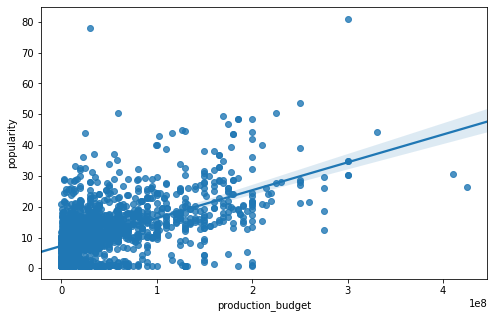

In [23]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'black', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(8, 5))
sns.regplot(x='production_budget', y='popularity', data=all_movies)
plt.show()

In [24]:
df.describe()

,index,id,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2.316000e+03,2.316000e+03,2.316000e+03
mean,11447.636874,210410.569516,10.685747,6.206261,1712.143351,3.790108e+07,4.953869e+07,1.201667e+08
std,7557.377373,144548.546190,8.244311,1.178079,2704.578576,5.150964e+07,8.261483e+07,2.218496e+08
min,1.000000,62.000000,0.600000,0.000000,1.000000,9.000000e+03,0.000000e+00,0.000000e+00
25%,5208.500000,71862.750000,5.487000,5.600000,63.000000,5.000000e+06,7.788272e+05,3.224914e+06
50%,11160.500000,208501.500000,9.506000,6.300000,615.000000,1.900000e+07,2.015790e+07,3.722812e+07
75%,17541.250000,330641.750000,14.423750,6.900000,2100.500000,4.650000e+07,5.830223e+07,1.248731e+08
max,26508.000000,587627.000000,80.773000,10.000000,22186.000000,4.250000e+08,7.605076e+08,2.776345e+09


## Let's one more time check mean values for movies gross and budgets.

In [47]:
print(f"mean value for production budget", all_movies.production_budget.mean())
print(f"mean value for domestic gross", all_movies.domestic_gross.mean())
print(f"mean value for worldwide gross", all_movies.worldwide_gross.mean())

mean value for production budget 37901080.82728843
mean value for domestic gross 49538689.39853195
mean value for worldwide gross 120166661.84585492


In [38]:
# quartile function. We divide the data into four quantiles and check the dependencies
def quantile(df, column_name):
# find quartile, max and min values
    min_value = df[column_name].min()
    first_quantile = df[column_name].describe()[4]
    second_quantile = df[column_name].describe()[5]
    third_quantile = df[column_name].describe()[6]
    max_value = df[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'First', 'Second', 'Third', 'Fourth'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    df[name] = pd.cut(df[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return df

In [41]:
p = quantile(all_movies, 'production_budget')
p.head(1)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,worldwide_gross_levels,production_budget_levels
0,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,425000000,760507625,2776345279,Fourth,Fourth


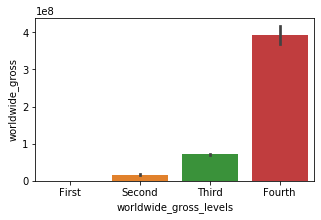

In [46]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'black', 'xtick.color': 'black',
               'ytick.color': 'black'})
plt.figure(figsize=(5, 3))
sns.barplot(x="worldwide_gross_levels", y="worldwide_gross", data=p)
plt.show()

**Most expensive movie in our data set**

In [37]:
all_movies[all_movies['production_budget']==425000000]

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,425000000,760507625,2776345279


In [88]:
all_movies[(all_movies['production_budget']<425000000) & (all_movies['production_budget']>37901080)]

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,worldwide_gross_levels,production_budget_levels
1,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,410600000,241063875,1045663875,Fourth,Fourth
2,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,330600000,459005868,1403013963,Fourth,Fourth
3,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,300000000,678815482,2048134200,Fourth,Fourth
4,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,300000000,229024295,655945209,Fourth,Fourth
5,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,300000000,229024295,655945209,Fourth,Fourth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,17485,"[12, 878]",299687,en,The 5th Wave,12.967,2016-01-15,The 5th Wave,5.8,3657,38000000,34912982,111336398,Third,Third
695,7934,"[18, 28]",96721,en,Rush,14.623,2013-09-27,Rush,7.7,3877,38000000,26947624,98230839,Third,Third
696,20725,[18],395991,en,Only the Brave,14.163,2017-10-20,Only the Brave,7.0,603,38000000,18340051,24555177,Second,Third
697,2558,"[27, 878, 9648, 53]",60935,en,The Thing,12.349,2011-10-14,The Thing,6.1,1404,38000000,16999934,27573078,Second,Third


**Here we see two super expensive movie. I want to remove this two movies for more believability data set**

## Cheking budget situation in top 200 popular movie

Using previos research about budgets, I decide to remove two most exprensive movie from our selection.

In [114]:
cur.execute('''SELECT tmdb.*, production_budget, domestic_gross, worldwide_gross 
               FROM tmdb_movies tmdb
               JOIN 
               (SELECT movie, 
                CAST(REPLACE(SUBSTR(production_budget,2),',','')as INTEGER) as production_budget, 
                CAST(REPLACE(SUBSTR(domestic_gross,2),',','')as INTEGER) as domestic_gross, 
                CAST(REPLACE(SUBSTR(worldwide_gross,2),',','')as INTEGER) as worldwide_gross 
                FROM tn_movie_budgets) tn
               ON tn.movie = tmdb.original_title 
               WHERE production_budget < 330600000
               ORDER BY popularity DESC
               LIMIT 200
            ''')
top_movies = pd.DataFrame(cur.fetchall())
top_movies.columns = [i[0] for i in cur.description]
top_movies

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross
0,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,300000000,678815482,2048134200
1,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,30000000,43037835,76235001
2,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,250000000,255119788,945577621
3,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,225000000,623279547,1517935897
4,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,60000000,23385416,48585416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,17401,"[28, 12, 878]",330459,en,Rogue One: A Star Wars Story,21.401,2016-12-16,Rogue One: A Star Wars Story,7.5,9296,200000000,532177324,1049102856
196,20655,"[28, 12, 878]",330459,en,Rogue One: A Star Wars Story,21.401,2016-12-16,Rogue One: A Star Wars Story,7.5,9296,200000000,532177324,1049102856
197,7889,"[14, 28, 35, 80]",49524,en,R.I.P.D.,21.377,2013-07-19,R.I.P.D.,5.6,2047,130000000,33618855,79076678
198,20656,"[28, 878, 53, 18]",315837,en,Ghost in the Shell,21.308,2017-03-31,Ghost in the Shell,6.0,5128,110000000,40563557,167910690


In [111]:
print('Top 200 Movies by Popularity')
print('Max Budget:',top_movies['production_budget'].max())
print('Min Budget:',top_movies['production_budget'].min())
print('Mean Budget:',top_movies['production_budget'].mean())
print('Median Budget:',top_movies['production_budget'].median())

Top 200 Movies by Popularity
Max Budget: 300000000
Min Budget: 2900000
Mean Budget: 114726000.0
Median Budget: 106000000.0


In [112]:
p = quantile(top_movies, 'production_budget')
p.head(1)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,production_budget_levels
0,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,300000000,678815482,2048134200,Fourth


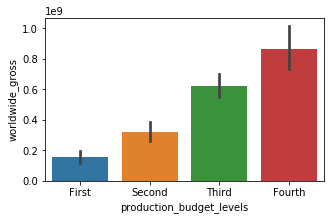

In [72]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'black', 'xtick.color': 'black',
               'ytick.color': 'black'})
plt.figure(figsize=(5, 3))
sns.barplot(x="production_budget_levels", y="worldwide_gross", data = p)
plt.show()

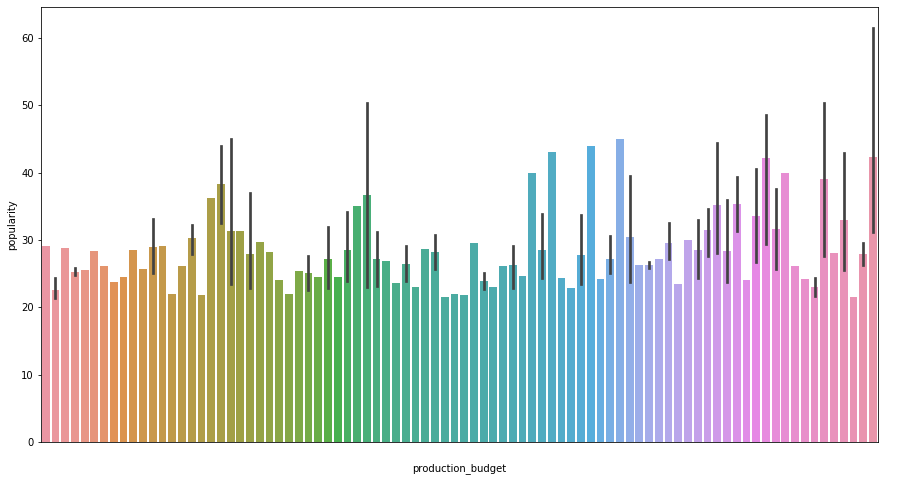

In [113]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'black', 'xtick.color': 'white',
               'ytick.color': 'black'})
plt.figure(figsize=(15, 8))
sns.barplot(x="production_budget", y="popularity", data=top_movies)
plt.show()

**How we can see - high budget doesn't garante high extrimly popularity. Let look for some factors**

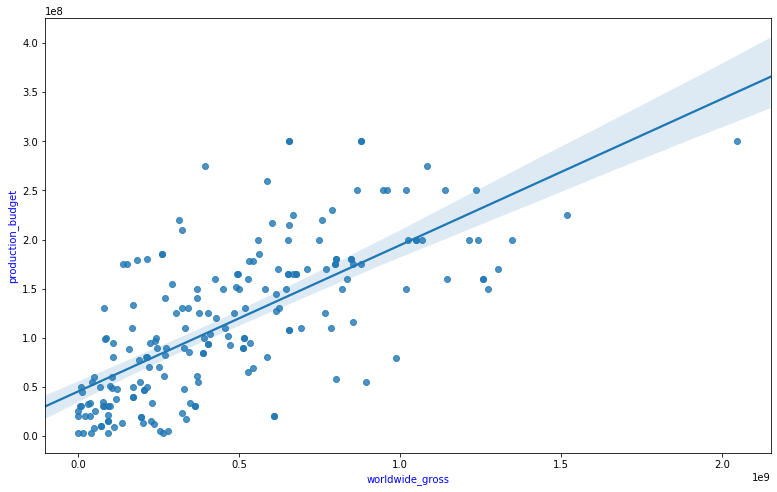

In [122]:
# Can we 
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'blue', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.regplot(x='worldwide_gross', y='production_budget', data=top_movies)
plt.xlabel("Production Budget");
plt.ylabel("Worldwide Gross");
plt.show()

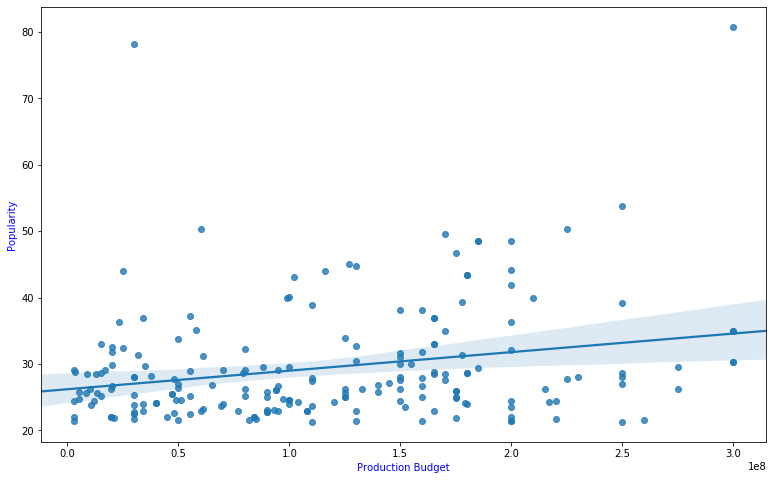

In [124]:
sns.set_style({'grid.color': 'black', 'axes.facecolor': 'white', 'figure.facecolor': 'white',
               'axes.edgecolor': 'black','axes.labelcolor': 'blue', 'xtick.color': 'black',
               'ytick.color': 'black'})

plt.figure(figsize=(13, 8))
sns.regplot(x='production_budget', y='popularity', data=top_movies)
plt.xlabel("Production Budget");
plt.ylabel("Popularity");
plt.show()

In [115]:
np.corrcoef(df['production_budget'], df['popularity'])

array([[1.        , 0.56529103],
       [0.56529103, 1.        ]])

Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. Our correlation coefficients equals 0.56529103. That mean: dependence is poorly expressed

In [116]:
np.corrcoef(df['production_budget'], df['worldwide_gross'])

array([[1.        , 0.79734395],
       [0.79734395, 1.        ]])

A coefficient of correlation of 0.8 indicates a strong correlation between the independent variable and the dependent variable. Our correlation coefficients equals 0.79734395 (almost there). That mean: if we spend a some money, it bring us some more.